In [1]:
from jax import numpy as jnp
import matplotlib.pyplot as plt

In [5]:
def ReLU(preactivation):

    activation = jnp.maximum(0, preactivation)

    return activation

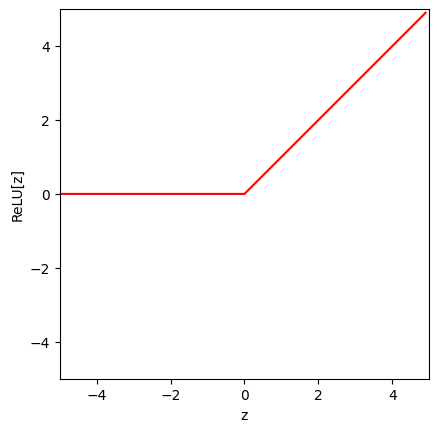

In [6]:
# Make an array of inputs
z = jnp.arange(-5,5,0.1)
RelU_z = ReLU(z)

# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU[z]')
ax.set_aspect('equal')
plt.show()

In [7]:
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
    pre_1 = theta_10 + theta_11 * x
    pre_2 = theta_20 + theta_21 * x
    pre_3 = theta_30 + theta_31 * x

    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)

    w_act_1 = phi_1 * act_1
    w_act_2 = phi_2 * act_2
    w_act_3 = phi_3 * act_3

    y = phi_0 + w_act_1 + w_act_2 + w_act_3

    return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [8]:
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

    # Plot intermediate plots if flag set
    if plot_all:
        fig, ax = plt.subplots(3,3)
        fig.set_size_inches(8.5, 8.5)
        fig.tight_layout(pad=3.0)
        ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
        ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
        ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
        ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
        ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
        ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
        ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
        ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
        ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

        for plot_y in range(3):
            for plot_x in range(3):
                ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
                ax[plot_y,plot_x].set_aspect(0.5)
            ax[2,plot_y].set_xlabel('Input, ');
        plt.show()

    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.set_xlabel('Input, '); ax.set_ylabel('Output, ')
    ax.set_xlim([0,1]);ax.set_ylim([-1,1])
    ax.set_aspect(0.5)
    if x_data is not None:
        ax.plot(x_data, y_data, 'mo')
        for i in range(len(x_data)):
            ax.plot(x_data[i], y_data[i],)
    plt.show()

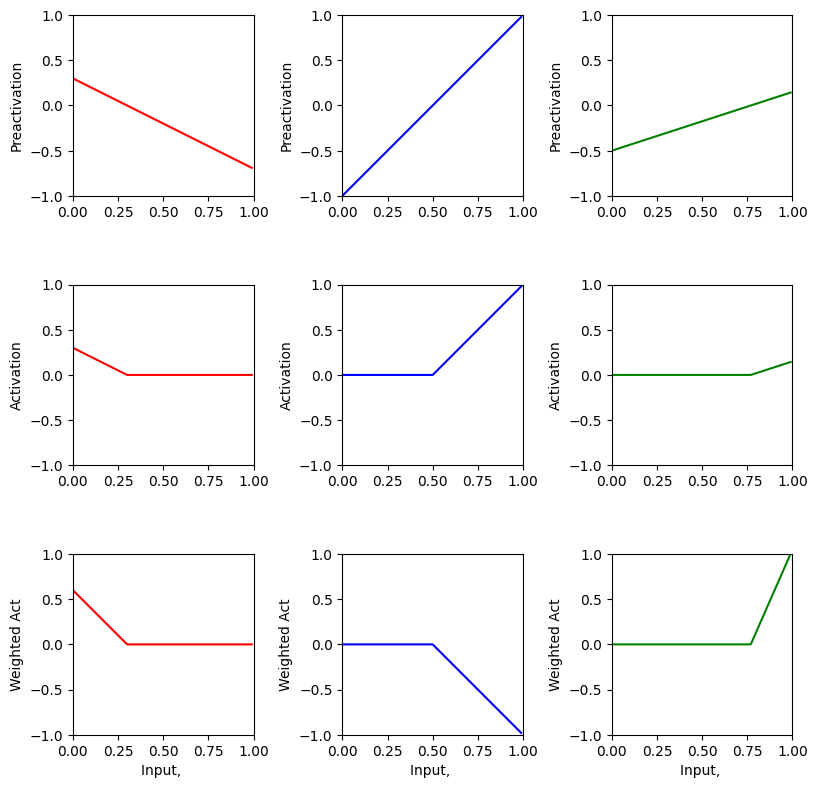

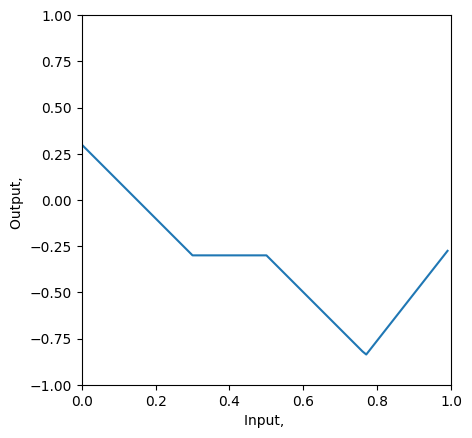

In [9]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = jnp.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

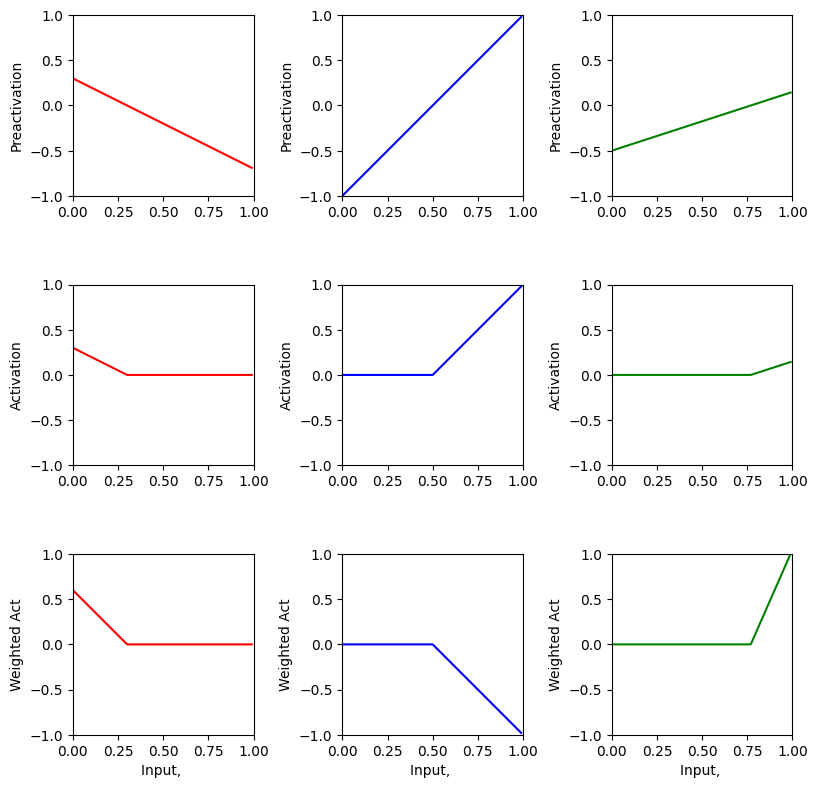

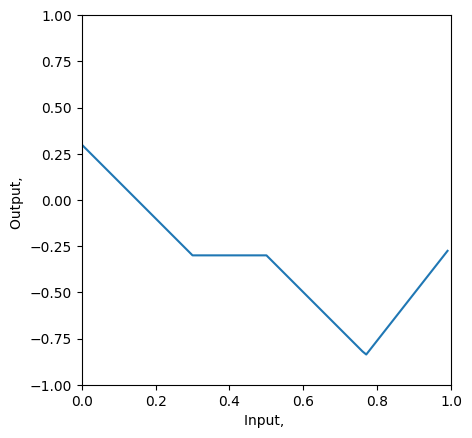

In [10]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = jnp.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

In [11]:
def least_squares_loss(y_train, y_predict):
    loss = jnp.sum((y_train - y_predict)**2)
    return loss

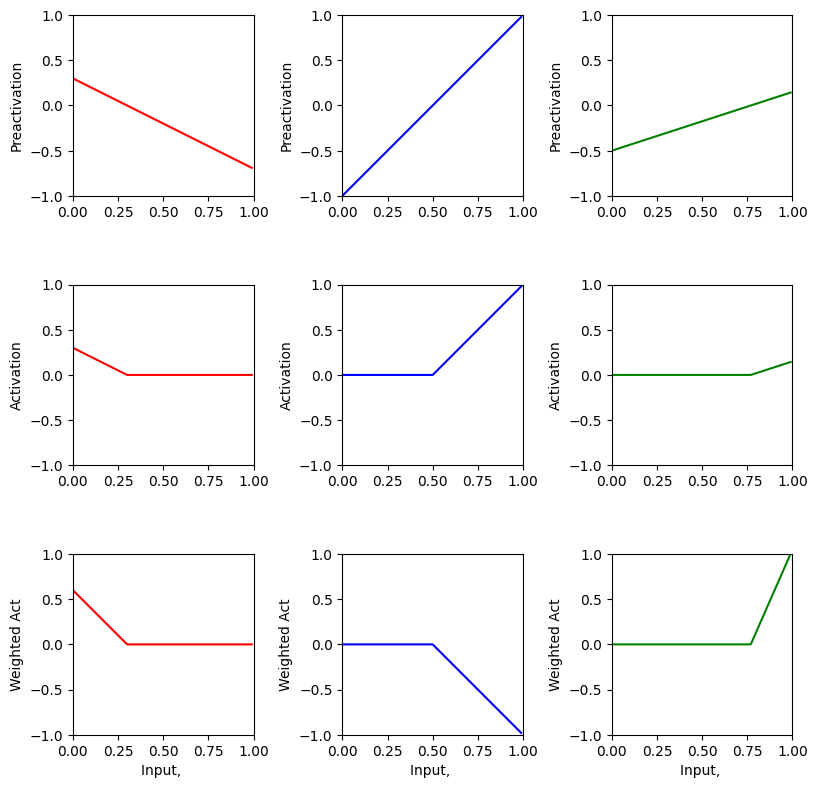

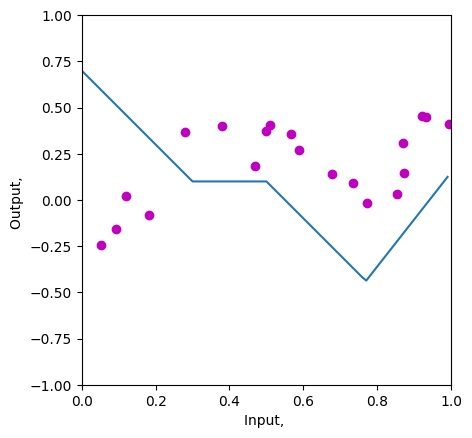

Your Loss = 3.637, True value = 9.385


In [18]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.1; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = jnp.arange(0,1,0.01)

x_train = jnp.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,
                     0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,
                     0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,
                     0.87168699,0.58858043])
y_train = jnp.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,
                     0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,
                     0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444,
                     0.148038840,0.26824970])

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data = x_train, y_data = y_train)

# Run the neural network on the training data
y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Compute the least squares loss and print it out
loss = least_squares_loss(y_train,y_predict)
print('Your Loss = %3.3f, True value = 9.385'%(loss))